Sterling Hayden  
Machine Learning  
# Linear Regression and Gradient Descent


In [3]:
import sys
import torch
import pandas as pd
import sklearn as sk
import IPython as ipy
import numpy as np
import matplotlib as mpl
import seaborn as sns
import sklearn as skl
import scipy as sp
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix # For scatter plots of columns

## Load Housing Dataset and Explore Data
* Dataset source: http://jse.amstat.org/v19n3/decock/AmesHousing.txt
* Dataset documentation: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
* Dataset write-up: http://jse.amstat.org/v19n3/decock.pdf

In [4]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area','Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
 sep='\t',
 usecols=columns)

print(df.shape)
df.head()

(2930, 6)


,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


### Preprocess Data
- Remove null  
- Map Central Air from Y(Yes) No(N) to 1 and 0


In [6]:
# Remove rows that contain missing values and check if there exist any null
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [7]:
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [8]:
df=pd.get_dummies(df,columns=['Central Air'],prefix='CA',drop_first=True)
#df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})
df.head()
# Note how the values for Central Air Input has changed fron Y N to 1 0

,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area,SalePrice,CA_Y
0,6,5,1080.0,1656,215000,1
1,5,6,882.0,896,105000,1
2,6,6,1329.0,1329,172000,1
3,7,5,2110.0,2110,244000,1
4,5,5,928.0,1629,189900,1


### Visualization of relation between different columns in data (inputs and output)
For this, I use mlxtend library. This is a great library for many visualization using matplotlib. If
you prefer to write your own feel free to do so.


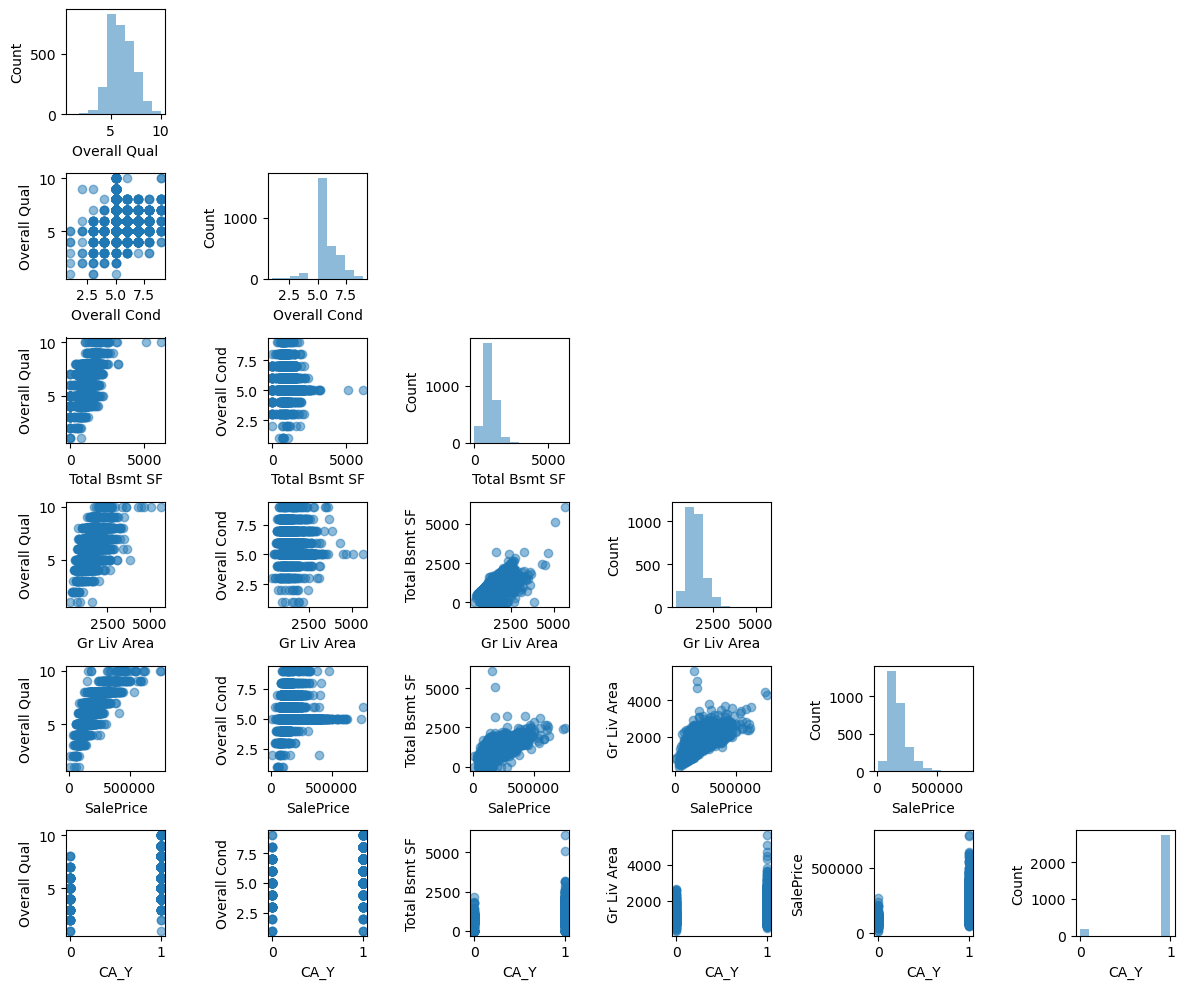

In [9]:
scatterplotmatrix(df.to_numpy(), figsize=(12, 10), names=df.columns, alpha=0.5)
plt.tight_layout()
#plt.savefig('figures/09_04.png', dpi=300)
plt.show()


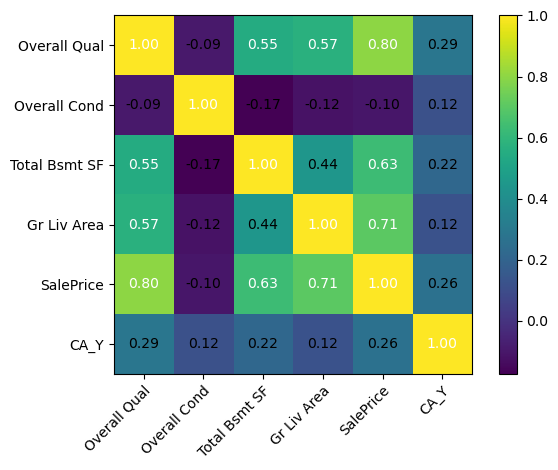

In [10]:
from mlxtend.plotting import heatmap
cm = np.corrcoef(df.to_numpy().T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()

## Simple and Multiple Linear Regression Using Gradient Descent

In [14]:
# A Simple class for performing Simple Linear Regression using Gradient Descent
# 
class SLRGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

# A member function that fits input X to output y using GD
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.beta = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # Initial
        self.intercept = np.array([0.])
        self.losses = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y-output # Note this is the negative of gradient so we no 
            # Update parameters of Linear Regression
            self.beta+= self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.intercept += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.beta) + self.intercept

    def predict(self, X):
        return self.net_input(X)

In [15]:
# Use ' Gr Liv Area ' as an input to test our SLRGD
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [16]:
# Standarize in Input and output before performing SLR (For Linear Regression 
# We will use sklearn StandardSclaer class to standarize the inputs and outputs
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

SLR coefficient beta =  [0.70661837]
SLR intercept =  [-1.58531812e-16]


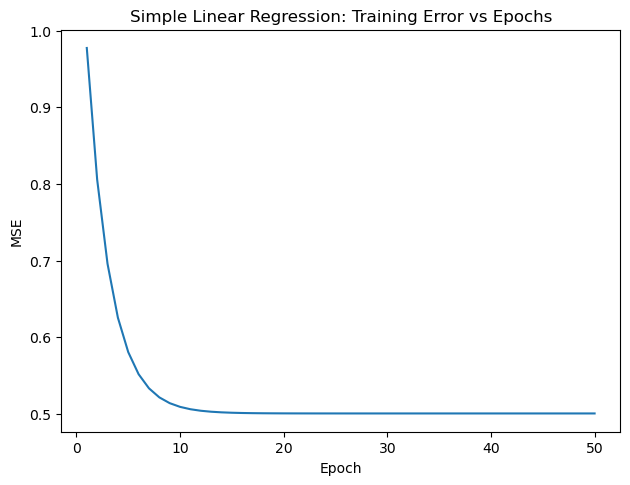

In [17]:

# Fit Simple Linear Regression Model on y vs X, print coeff of simple linear re
SLR = SLRGD(eta=0.1) # Try with different eta values: eta = 0.01 , 0.1, 0.5 an
SLR.fit(X_std, y_std)
print('SLR coefficient beta = ', SLR.beta)
print('SLR intercept = ', SLR.intercept)
plt.plot(range(1, SLR.n_iter+1), SLR.losses)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.title('Simple Linear Regression: Training Error vs Epochs')
plt.show()

In [19]:
# Fucntion to plot Simple Linear Regression and plot SLR curve(line) we just c
def lin_regplot(X, y, model):
 plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
 plt.plot(X, model.predict(X), color='red', lw=3) 
 return

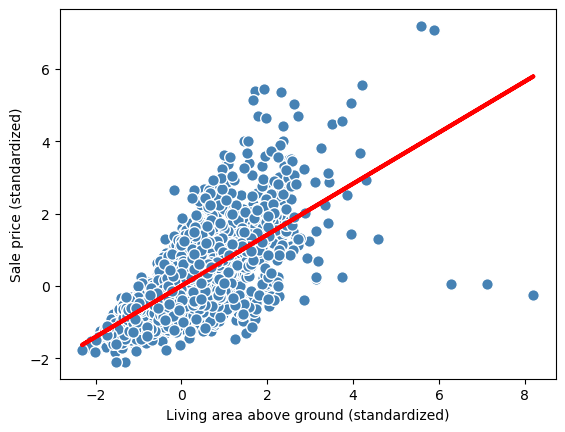

In [20]:

# Plot the Simple Linear Regression we computed for Sales vs Living Area
lin_regplot(X_std, y_std, SLR)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

In [22]:
# Predict the Housing Price for some living area using predict() in SLRGD we pe
area = np.array([[3000]])
input_std = sc_x.transform(area)
output_std = SLR.predict(input_std)
print(output_std) # Note this output value (Sales price) does not make sense.

[2.09740902]


In [23]:
target_reverted = sc_y.inverse_transform(output_std.reshape(-1, 1)) # Note we n
print(f'Sale price: ${target_reverted.flatten()[0]:.3f}')
# Note the new invserse transformed predicted Sales price for a house

Sale price: $348339.418


### Immplement Multiple Linear Regression
Create LRGD class similar to SLRGD class but is able to perform multiple linear regression.
i.e. take more than 1 input.

In [25]:
class LRGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    # A member function that fits input X to output y using GD
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.beta = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.intercept = np.array([0.])
        self.losses = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y-output
            # Update parameters of Linear Regression
            self.beta+= self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.intercept += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses.append(loss)
        return self
    def net_input(self, X):
        return np.dot(X, self.beta) + self.intercept
    def predict(self, X):
        return self.net_input(X)

### Multiple Linear Regression on the Housing Data
a) Perform Multiple Linear Regression on SalePrice vs 5 inputs ('Overall Qual', 'Overall
Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', ) using your new LRGD class.  
b) Print all the coefficients of linear Regression like we did above for SLRGD. Now you will
have intercept and many other coefficients.
Note: You might need to first convert categorical variable 'Central Air' to dummy variable
using pd.getdummies() to get dummy variable, pd.drop() to drop the origianl 'Central Air'
input and then add dummy variables you created for 'Central Air' into your input dataframe.  
  
**Categorical variable 'Central Air' to dummy variable is handled already by
pandas.get_dummies to get dummy variable, no need to apply pd.drop() to drop the
origianl 'Central Air' input and then add dummy variables you created for 'Central Air' into
your input dataframe because it's already handled by new pandas.get_dummies**

In [26]:
#lets check
print(df.head(10))


   Overall Qual  Overall Cond  Total Bsmt SF  Gr Liv Area  SalePrice  CA_Y
0             6             5         1080.0         1656     215000     1
1             5             6          882.0          896     105000     1
2             6             6         1329.0         1329     172000     1
3             7             5         2110.0         2110     244000     1
4             5             5          928.0         1629     189900     1
5             6             6          926.0         1604     195500     1
6             8             5         1338.0         1338     213500     1
7             8             5         1280.0         1280     191500     1
8             8             5         1595.0         1616     236500     1
9             7             5          994.0         1804     189000     1


In [27]:
# Use 'Overall Qual', 'Overall Cond', 'Gr Liv Area','Total Bsmt SF','CA_Y' for X
X = df[['Overall Qual', 'Overall Cond', 'Gr Liv Area','Total Bsmt SF','CA_Y']].values
y = df['SalePrice'].values

In [28]:
#standarize the dataset to avoid model fit on greater values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()


In [29]:
#applying our multiple linear regression
LRGD = LRGD(eta=0.1)
LRGD.fit(X_std, y_std)


In [32]:
### Solution for b: Print the intercept and coefficients (\beta)

#y=B0 + B1 * Overall Qual + B2 * Overall Cond + B3 * Gr Liv Area + B4 * Total B
print(f'coefficient betas: \n B1 = {LRGD.beta[0]} \n B2 = {LRGD.beta[1]} \n B3 = {LRGD.beta[2]} \n B4 = {LRGD.beta[3]} \n B5 = {LRGD.beta[4]}')
print('Intercept B0 = ', LRGD.intercept[0])

coefficient betas: 
 B1 = 0.48074157783265836 
 B2 = 0.01564980310363235 
 B3 = 0.3342873368419255 
 B4 = 0.21562636050585327 
 B5 = 0.03639452298401413
Intercept B0 =  -1.931007229993308e-16


## Scikit Learn to do Simple and Multiple Linear Regression on Housing Data  
a) Use Scikit Learn library to do Simple Linear Regression and Multiple Linear Regression on
Housing Data. For Simple Linear Regression you can only do for 'Gr Liv Area' as input
variable.  
b) Print all coefficients for both cases.  
c) Compare your coefficients from SLRGD, LRGD and ones that you got from using Scikit
learn library.  

**Solution for a) Scikit Learn for Simple and Multiple Linear Regression in Housing Data
Simple Linear Regression**

In [33]:
#importing Scikit Learn library
import sklearn.linear_model as skl_lm
#creating SLR regressor object for SLR regression
SLR_regr = skl_lm.LinearRegression()
#defining variables for 'Gr Liv Area' as input and 'SalePrice' as output
X=df[['Gr Liv Area']].values
y=df['SalePrice'].values
#Standarization
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
SLR_regr.fit(X_std,y_std)


LinearRegression()

**Multiple Linear Regression**

In [35]:
#importing Scikit Learn library
import sklearn.linear_model as skl_lm
#creating MLR regressor object for MLR regression
MLR_regr = skl_lm.LinearRegression()
#defining variables for 'Gr Liv Area' as input and 'SalePrice' as output
X = df[['Overall Qual', 'Overall Cond', 'Gr Liv Area','Total Bsmt SF','CA_Y']].values
y=df['SalePrice'].values
#Standarization
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
MLR_regr.fit(X_std,y_std)


LinearRegression()

**Solution For b: Coeff of Simple and Multiple Linear Regression using Scikit Learn**

In [37]:
#print all coefficients for both cases
print('Coeffiecient for Simple Linear Regression')
print('B1=',SLR_regr.coef_)
print('B0=',SLR_regr.intercept_)
print('\nCoeffiecient for Multiple Linear Regression')
print(f'coefficient betas: \n B1 = {MLR_regr.coef_[0]} \n B2 = {MLR_regr.coef_[1]} \n B3 = {MLR_regr.coef_[2]} \n B4 = {MLR_regr.coef_[3]} \n B5 = {MLR_regr.coef_[4]}')
print('Intercept B0=',MLR_regr.intercept_)


Coeffiecient for Simple Linear Regression
B1= [0.70662822]
B0= -1.4794494024145022e-16

Coeffiecient for Multiple Linear Regression
coefficient betas: 
 B1 = 0.48268956468000707 
 B2 = 0.01558490266090179 
 B3 = 0.33319983786666346 
 B4 = 0.21476646743803318 
 B5 = 0.03601169250772092
Intercept B0= -1.9721224532603162e-16


**Solution for c : Compare Implementation using Gradient Descent and Scikit Learn**
**Comparison for Simple Linear Regression Coefficient**

In [40]:
#calulating difference 
dif_in=SLR_regr.intercept_-SLR.intercept
print(f'difference in intercept ={dif_in[0]:.20f}')
#SLR coefficient beta = [0.70661837]
#SLR intercept = [-1.58289223e-16]
dif_beta=SLR_regr.coef_-SLR.beta
print(f'difference in Coefficient={dif_beta[0]:.20f}')

difference in intercept =0.00000000000000001059
difference in Coefficient=0.00000985350068527513


**Comparison for Multiple Linear Regression Coefficient**

In [42]:
#calulating difference 
for i in range(len(LRGD.beta)):
    dif_B=LRGD.beta[i]-MLR_regr.coef_[i]
    print(f'difference in Beta{i+1} ={dif_B:.5f}')
    dif_beta=LRGD.intercept-MLR_regr.intercept_
    print(f'difference in Intercept={dif_beta[0]:.5f}')


difference in Beta1 =-0.00195
difference in Intercept=0.00000
difference in Beta2 =0.00006
difference in Intercept=0.00000
difference in Beta3 =0.00109
difference in Intercept=0.00000
difference in Beta4 =0.00086
difference in Intercept=0.00000
difference in Beta5 =0.00038
difference in Intercept=0.00000


## Multiple Linear Regression with modified input variable.
Sometimes when we plot some input variable vs response, we might notice that the relation
between input and response is highly-nonlinear (eg. quadratic) and we might want to
include a quadratic term of that input variable in our linear regression. For example lets say
we want to model a liner regression by assuming Salesprice is quadratic to 'Total Bsmt SF'.
We can introduce a new input variable square of Total Bsmt SF.
-Create a new variable 'Mod Total Bsmt SF' = Total Bsmt SF*Total Bsmt SF. -Replace 'Total
Bsmt SF' variable with new varaible you created 'Mod Total Bsmt SF' -Do Multiple Linear
Regression using scikit learn using new input dataframe that has ('Overall Qual', 'Overall
Cond', 'Gr Liv Area', 'Central Air', 'Mod Total Bsmt SF') as inputs.
-Compare Coeff you got in original multiple linear regression vs one with modified input.
Make sure the order of all inputs are same in both cases: For example if 'Central Air' is 4th
column in your original input data frame, make sure it is also in 4th column and so and so
forth for other variables as well.

In [43]:
#adding Mod Total Bsmt SF to dataset
df['Mod Total Bsmt SF']=df['Total Bsmt SF']**2
#Replace 'Total Bsmt SF' variable with new varaible you created 'Mod Total Bsmt
df1=df.drop(['Total Bsmt SF'], axis=1)
df1.head()


,Overall Qual,Overall Cond,Gr Liv Area,SalePrice,CA_Y,Mod Total Bsmt SF
0,6,5,1656,215000,1,1166400.0
1,5,6,896,105000,1,777924.0
2,6,6,1329,172000,1,1766241.0
3,7,5,2110,244000,1,4452100.0
4,5,5,1629,189900,1,861184.0


In [46]:
# Use 'Overall Qual', 'Overall Cond', 'Gr Liv Area','Mod Total Bsmt SF','CA_Y' 
X = df1[['Overall Qual', 'Overall Cond', 'Gr Liv Area','Mod Total Bsmt SF','CA_Y']].values
y = df1['SalePrice'].values
print(X[0][3])

1166400.0


In [47]:
#standarize the dataset to avoid model fit on greater values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()


In [48]:
#creating MLR regressor object for MLR regression
MLR_regr2 = skl_lm.LinearRegression()
MLR_regr2.fit(X_std,y_std)

LinearRegression()

**Comparison of Co-efficeint**

In [51]:
print('\nCoeffiecient for Multiple Linear Regression with modified data')
print(f'coefficient betas: \n B1 = {MLR_regr2.coef_[0]} \n B2 = {MLR_regr2.coef_[1]} \n B3 = {MLR_regr2.coef_[2]} \n B4 = {MLR_regr2.coef_[3]} \n B5 = {MLR_regr2.coef_[4]}')
print('Intercept B0=',MLR_regr2.intercept_)



Coeffiecient for Multiple Linear Regression with modified data
coefficient betas: 
 B1 = 0.5342517507196706 
 B2 = 0.0009588153530123821 
 B3 = 0.33962101264378297 
 B4 = 0.12069180480282744 
 B5 = 0.052769849019383364
Intercept B0= -1.525242417053372e-16
